In [7]:
import pandas as pd
pubChem_data = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/PubChem_compound_smiles_substructure_C.csv')
pubChem_smiles = pubChem_data.iloc[:,13].tolist()
print(pubChem_smiles)
pubChem_smiles = pd.DataFrame(pubChem_smiles)
pubChem_smiles.columns = ['SMILES']
pubChem_smiles.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/pubchem_smiles.csv', index=False)

['C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N', 'C[C@@]1([C@H]2[C@@H]([C@H]3[C@@H](C(=O)C(=C([C@]3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O)O', 'C([C@@H]([C@@H]1C(=C(C(=O)O1)O)O)O)O', 'CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N+](C)(C)C)OC(=O)CCCCCCC/C=C\\C/C=C\\CCCCC', 'CC1(C(C1C(=O)OC(C#N)C2=CC(=CC=C2)OC3=CC=CC=C3)/C=C(/C(F)(F)F)\\Cl)C', 'C[C@H](CCCC(C)C)[C@H]1CC[C@@H]\\2[C@@]1(CCC/C2=C\\C=C/3\\C[C@H](CCC3=C)O)C', 'C[C@H](/C=C/[C@H](C)C(C)C)[C@H]1CC[C@@H]\\2[C@@]1(CCC/C2=C\\C=C/3\\C[C@H](CCC3=C)O)C', 'CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+]', 'C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O', 'C(=S)(N)N', 'C1=CC=C2C(=C1)NC(=S)S2', 'CC(=CCC/C(=C/C=O)/C)C', 'CC(=CCC/C(=C/CO)/C)C', 'CCCCCCCC/C=C\\CCCCCCCC(=O)O', 'CC(=CCC/C(=C/CC/C(=C/CO)/C)/C)C', 'C(=C\\C(=O)O)\\C(=O)O', 'CC1(C(C1C(=O)OCC2=CC(=CC=C2)OC3=CC=CC=C3)C=C(Cl)Cl)C', 'C[C@H]1[C@@]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H]([C@H]2O)O)N=C(N)N)O)N=C(N)N)O[C@H]3[C@H]([C@@H]([C@H]([C@@H](O3)CO)O)O)NC)(C=O)O'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

full_smiles_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/train_val_test_full.csv')
G_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/model_10_10/test_predict.csv')
full_smiles = full_smiles_set.iloc[:,0].tolist()

G_predict = G_predict_set.iloc[:,1].tolist()
G_true = G_predict_set.iloc[:,0].tolist()


CP_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/test_preds_temp _CHEMPROP.csv')
CP_predict = CP_predict_set.iloc[:,1].tolist()
CP_smiles = CP_predict_set.iloc[:,0].tolist()

In [3]:


full_smiles = pd.DataFrame(full_smiles)
full_smiles.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/full_smiles.csv', index=False)


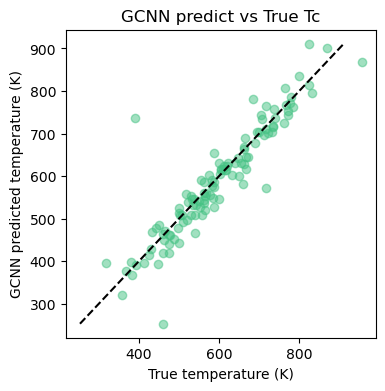

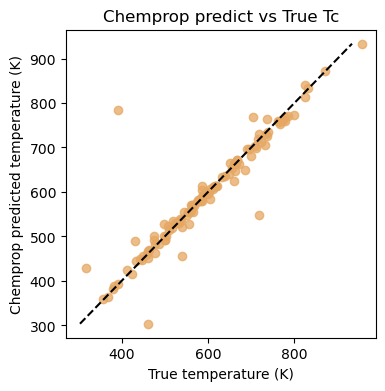

In [38]:
#predict vs true for GCNN and Chemprop

hex_color = '#44C283'
rgb_color = tuple(int(hex_color[i:i+2], 16) / 255 for i in (1, 3, 5))
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, G_predict, c=[rgb_color], alpha=0.50)
plt.plot([min(G_predict), max(G_predict)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs True Tc')
plt.show()


hex_color = '#E6A762'
rgb_color = tuple(int(hex_color[i:i+2], 16) / 255 for i in (1, 3, 5))
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, CP_predict, c=[rgb_color], alpha=0.75)
plt.plot([min(CP_predict), max(CP_predict)], [min(CP_predict),max(CP_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('Chemprop predicted temperature (K)')
plt.title('Chemprop predict vs True Tc')
plt.show()

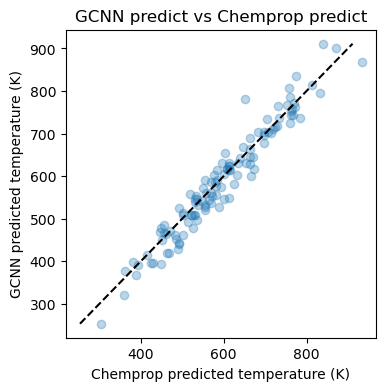

In [4]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(CP_predict, G_predict, alpha=0.3)
plt.plot([min(G_predict), max(G_predict)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('Chemprop predicted temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs Chemprop predict')
plt.show()


In [5]:
#how to get the error associated with each data point? 
#true abs erroe = abs(predicted - actual)
chemprop_error = []
gcnn_error = []
for index in range(0, len(G_true)):
    cp_error = (abs(CP_predict[index] - G_true[index])/G_true[index])*100
    g_error = (abs(G_predict[index] - G_true[index])/G_true[index])*100
    chemprop_error.append(cp_error)
    gcnn_error.append(g_error)



In [6]:
print(chemprop_error)
chemprop_smiles_error = list(zip(CP_smiles, chemprop_error))

chemprop_smiles_error = pd.DataFrame(chemprop_smiles_error)
chemprop_smiles_error.columns = ['SMILES', 'chemprop_error%']

chemprop_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/chemprop_smiles_error_percent.csv', index=False)


[3.542535124160363, 3.2942738107494733, 0.5367466638278559, 2.483356596816017, 1.2365919870659043, 0.38387312840600263, 0.6769674962485234, 0.4985722078448098, 0.8386100078522055, 0.15440022679780793, 0.27891688671519094, 0.2005996661911143, 0.5278231192814975, 0.16837242767919666, 1.5916687446353914, 0.2950625258350043, 0.4628965089406944, 0.19807503744393792, 0.5377961903860042, 0.4557736291028159, 1.2141969468246876, 0.6222959254388032, 2.201151657973374, 5.652851535403871, 1.259348334985596, 0.7550802515892105, 0.10145561177570482, 0.3578559994778163, 0.931865927657634, 8.92161364555224, 0.6477327307602998, 1.2542822422070987, 0.4706785864200021, 3.0857701856746393, 0.23970714616921596, 1.428875447399901, 0.3693183874205315, 0.7927697093116992, 100.58853246792287, 3.4355302542807657, 1.3158143154483646, 2.9102852444796783, 3.3450500458246832, 1.453707637416243, 1.830611137208565, 0.708686496700357, 0.7742771340946965, 1.9755112114012447, 5.019459569230398, 3.36849109980328, 2.23623

In [ ]:
print(gcnn_error)
gcnn_smiles_error = list(zip(CP_smiles, gcnn_error))

gcnn_smiles_error = pd.DataFrame(gcnn_smiles_error)
gcnn_smiles_error.columns = ['SMILES', 'gcnn_error%']

gcnn_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/gcnn_smiles_error_percent.csv', index=False)

[0.2461702463676591, 4.276070000000004, 1.2247305475504358, 0.7643774069319709, 0.9092406235530058, 0.692979050279328, 0.7757561374795411, 3.5569520958083856, 0.1764527683233172, 3.558926389737326, 4.792370524852272, 4.344916967509028, 5.151276915373064, 3.6357293233082686, 7.967170029845418, 4.833713924916467, 4.810490092270456, 2.5663796992481216, 4.971245085190043, 7.799380445304946, 4.184880952380948, 1.842792302106019, 2.2945160103054794, 4.119458646616538, 3.85814134092674, 3.7174244640394454, 1.8724010731052971, 4.819044555833016, 0.973379667043797, 5.574723404255313, 1.9213528729922262, 1.2706350914962365, 2.817564182215367, 4.182458812060769, 1.1369868457656156, 2.5052354171760833, 6.226128394173696, 5.505196335078537, 88.42421645132403, 5.823935185185186, 2.9687565687642334, 11.580394093703708, 3.8371409028727723, 4.951552521471052, 2.0988888888888857, 0.398785500747394, 3.53146574154379, 7.965700483091798, 14.090839661214966, 1.6619000331016223, 0.9205060422960725, 2.8081922

In [8]:
print(chemprop_error)

[3.542535124160363, 3.2942738107494733, 0.5367466638278559, 2.483356596816017, 1.2365919870659043, 0.38387312840600263, 0.6769674962485234, 0.4985722078448098, 0.8386100078522055, 0.15440022679780793, 0.27891688671519094, 0.2005996661911143, 0.5278231192814975, 0.16837242767919666, 1.5916687446353914, 0.2950625258350043, 0.4628965089406944, 0.19807503744393792, 0.5377961903860042, 0.4557736291028159, 1.2141969468246876, 0.6222959254388032, 2.201151657973374, 5.652851535403871, 1.259348334985596, 0.7550802515892105, 0.10145561177570482, 0.3578559994778163, 0.931865927657634, 8.92161364555224, 0.6477327307602998, 1.2542822422070987, 0.4706785864200021, 3.0857701856746393, 0.23970714616921596, 1.428875447399901, 0.3693183874205315, 0.7927697093116992, 100.58853246792287, 3.4355302542807657, 1.3158143154483646, 2.9102852444796783, 3.3450500458246832, 1.453707637416243, 1.830611137208565, 0.708686496700357, 0.7742771340946965, 1.9755112114012447, 5.019459569230398, 3.36849109980328, 2.23623

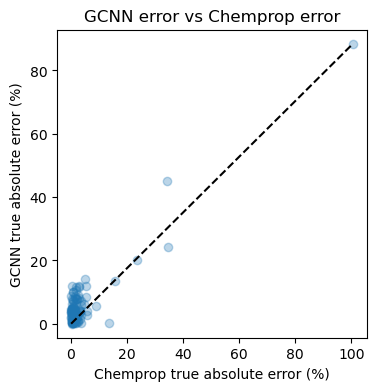

In [ ]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(chemprop_error, gcnn_error, alpha=0.3)
plt.plot([min(chemprop_error), max(chemprop_error)], [min(gcnn_error),max(gcnn_error)], color="k", ls="--")
plt.xlabel('Chemprop true absolute error (%)')
plt.ylabel('GCNN true absolute error (%)')
plt.title('GCNN error vs Chemprop error')
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


ARMA_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/model_10_29_III/test_predict.csv')
ARMA_predict = ARMA_predict_set.iloc[:,1].tolist()
true = ARMA_predict_set.iloc[:,0].tolist()


default_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/test_preds_temp _CHEMPROP.csv')
default_predict = default_predict_set.iloc[:,1].tolist()

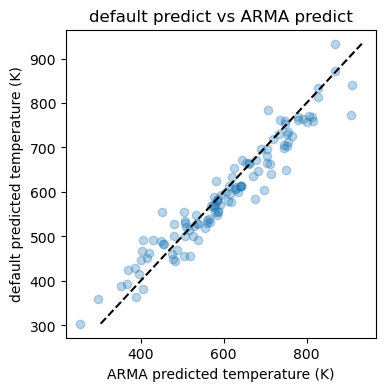

In [6]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(ARMA_predict, default_predict, alpha=0.3)
plt.plot([min(default_predict), max(default_predict)], [min(default_predict),max(default_predict)], color="k", ls="--")
plt.xlabel('ARMA predicted temperature (K)')
plt.ylabel('default predicted temperature (K)')
plt.title('default predict vs ARMA predict')
plt.show()


In [4]:
#how to get the error associated with each data point? 
#true abs erroe = abs(predicted - actual)
ARMA_error = []
default_error = []
for index in range(0, len(true)):
    Arma_error = (abs(ARMA_predict[index] - true[index])/true[index])*100
    Def_error = (abs(default_predict[index] - true[index])/true[index])*100
    ARMA_error.append(Arma_error)
    default_error.append(Def_error)



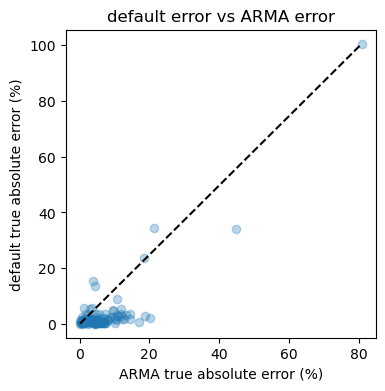

In [5]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(ARMA_error, default_error, alpha=0.3)
plt.plot([min(ARMA_error), max(ARMA_error)], [min(default_error),max(default_error)], color="k", ls="--")
plt.xlabel('ARMA true absolute error (%)')
plt.ylabel('default true absolute error (%)')
plt.title('default error vs ARMA error')
plt.show()

In [10]:
# first create csv
#SMILES, Real temp, Chemprop temp, GCNN temp, Chemprop error, GCNN error
big_list = list(zip(CP_smiles, G_true, CP_predict, G_predict,  chemprop_error, gcnn_error))

whole_thing = pd.DataFrame(big_list)
whole_thing.columns = ['SMILES', 'critical_temp', 'chemprop_pred', 'gcnn_pred', 'chemprop_error%', 'gcnn_error%']

whole_thing.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/whole_thing.csv', index=False)

In [25]:
N =['C=CCN', 'CCNCC', 'Cc1ccc(C)[nH]1', 'OCCNCCO', 'COCCC#N', 'NCCNCCO', 'FC(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'Cc1ccccn1', 'FC(F)CN(C(F)(F)F)C(F)(F)F', 'CCN(C(F)(F)F)C(F)(F)F', 'CN', 'CC(=O)N(C)C', 'C=CC#N', 'Cc1ccc2ccccc2n1']
O =['COC(C)=O', 'OCC1CCC(CO)CC1', 'CCCCCCOC(=O)CO', 'COC(=O)c1ccc(C(=O)OC)cc1', 'CCc1ccc(O)cc1', 'CCC(=O)OCCC(C)C', 'COC(=O)CCC(C)=O', 'CCCC(C)=O', 'CCC(C)CO', 'CCCCCCCCO[Ti](OCCCCCCCC)(OCCCCCCCC)OCCCCCCCC', 'CC=CC(=O)OCC', 'COc1cccc(C)c1', 'COCC(F)(F)F', 'CCOCOCC', 'Cc1ccccc1C(=O)O', 'C=CC(=O)OCC(CC)CCCC', 'C=C(C)OC', 'CCCO', 'CCOCCC(=O)OCC', 'OCCCOCCCO', 'COC(C)C', 'CC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC1(F)OC(F)(F)C(F)(F)O1', 'CC(C)C(C)O', 'O=[As](Br)(Br)Br', 'CCOC(C)=O', 'C1COCCO1', 'OCCCCCO', 'COC(=O)CCCCCC(=O)OC', 'CS(C)=O', 'OCCNCCO', 'C[Si](C)(C)O[Si](C)(C)C', 'CCCC(=O)CCC', 'CCCCCCOCCCCCC', 'COC(=O)OC', 'FC(F)COC(F)(F)C(F)F', 'O=C(C(F)(F)F)C(F)(F)F', 'COCCC#N', 'NCCNCCO', 'C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C', 'c1ccc2c(c1)oc1ccccc12', 'FC(F)(F)COCC(F)(F)F', 'CCCCOC(=O)CCC', 'CCCCCO', 'CCC(=O)OC', 'COC(=O)CO', 'c1ccc(Oc2ccccc2)cc1', 'CCCC(=O)CC', 'C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1', 'CCCCOCCOCCOC(C)=O', 'CC(=O)OCC(C)C', 'CCCOC(=O)C(C)C', 'FC(F)OC(F)(F)C(F)Cl', 'C[Si@]1(c2ccccc2)O[Si@@](C)(c2ccccc2)O[Si@@](C)(c2ccccc2)O1', 'CCCCCCC=O', 'CC(=O)N(C)C', 'FC(F)(F)CC(F)(OC(F)(F)F)C(F)(F)F', 'CC(CO)CO', 'CC(O)c1ccccc1', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']
F =['Fc1ccc(Br)cc1', 'COCC(F)(F)F', 'CC(F)(F)C(F)(F)F', 'Fc1ccc(F)c(F)c1F', 'Fc1cc(F)c(F)cc1F', 'CC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC(F)C(F)C(F)(F)F', 'FC1(F)OC(F)(F)C(F)(F)O1', 'FC1(F)C(F)(F)C(F)(F)C2(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C2(F)C1(F)F', 'Fc1c(Cl)c(F)c(Cl)c(F)c1Cl', 'FC1=C(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F', 'Fc1cccc(Cl)c1', 'FC(F)COC(F)(F)C(F)F', 'O=C(C(F)(F)F)C(F)(F)F', 'FC(F)(F)COCC(F)(F)F', 'FC(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC(F)CN(C(F)(F)F)C(F)(F)F', 'FS(F)(F)(F)(F)F', 'CCN(C(F)(F)F)C(F)(F)F', 'FC(F)C(F)F', 'FC(F)(Cl)C(F)(Cl)Cl', 'FC(F)OC(F)(F)C(F)Cl', 'FC(F)(F)CC(F)(OC(F)(F)F)C(F)(F)F', 'Cc1ccc(F)cc1F', 'F', 'F/C=C/C(F)(F)F']
C =['COC(C)=O', 'OCC1CCC(CO)CC1', 'CCCCCCOC(=O)CO', 'COC(=O)c1ccc(C(=O)OC)cc1', 'CC(C)(C)C1CCCCC1', 'CCc1ccc(O)cc1', 'CCC(=O)OCCC(C)C', 'COC(=O)CCC(C)=O', 'CCCC(C)=O', 'Fc1ccc(Br)cc1', 'CCC(C)CO', 'CCCCCCCCO[Ti](OCCCCCCCC)(OCCCCCCCC)OCCCCCCCC', 'CC=CC(=O)OCC', 'COc1cccc(C)c1', 'COCC(F)(F)F', 'CC(F)(F)C(F)(F)F', 'ClC(Cl)C(Cl)Cl', 'CCOCOCC', 'Cc1ccccc1C(=O)O', 'C=CCCC=C', 'C=CC(=O)OCC(CC)CCCC', 'Fc1ccc(F)c(F)c1F', 'Fc1cc(F)c(F)cc1F', 'CCS', 'c1ccc(-c2ccccc2)cc1', 'C=C(C)OC', 'CCCO', 'C1CCCCC1', 'CCOCCC(=O)OCC', 'OCCCOCCCO', 'CC[Si](CC)(CC)CC', 'COC(C)C', 'CC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC(F)C(F)C(F)(F)F', 'CCCCl', 'FC1(F)OC(F)(F)C(F)(F)O1', 'CC(C)C(C)O', 'c1ccc2sccc2c1', 'C=CCN', 'CCOC(C)=O', 'C1COCCO1', 'OCCCCCO', 'CCNCC', 'COC(=O)CCCCCC(=O)OC', 'CCCC(C)CC', 'CCC(C)(CC)CC', 'FC1(F)C(F)(F)C(F)(F)C2(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C2(F)C1(F)F', 'Fc1c(Cl)c(F)c(Cl)c(F)c1Cl', 'C1CCCCCC1', 'Cc1ccc(C)[nH]1', 'CCCCCCCCCCCCCCCC', 'CS(C)=O', 'OCCNCCO', 'C[Si](C)(C)O[Si](C)(C)C', 'CCC=C(C)C', 'FC1=C(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F', 'CCCl', 'CCCC(=O)CCC', 'Fc1cccc(Cl)c1', 'CCCCCCCCCCCCCCCCC', 'CCCCCCOCCCCCC', 'COC(=O)OC', 'FC(F)COC(F)(F)C(F)F', 'O=C(C(F)(F)F)C(F)(F)F', 'COCCC#N', 'NCCNCCO', 'C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C', 'c1ccc2c(c1)oc1ccccc12', 'ClC1CCCCC1', 'CC(C)(C)C', 'FC(F)(F)COCC(F)(F)F', 'CCCCOC(=O)CCC', 'CCCCCO', 'CCC(=O)OC', 'C=CCl', 'FC(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'C=CCCCCCCCCCCCCCCCCCC', 'COC(=O)CO', 'C=CCCCCCC', 'c1ccc(Oc2ccccc2)cc1', 'Cc1ccccn1', 'CCCC(=O)CC', 'FC(F)CN(C(F)(F)F)C(F)(F)F', 'CCN(C(F)(F)F)C(F)(F)F', 'FC(F)C(F)F', 'C=CCCCCCCCCCCCCCCC', 'C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1', 'FC(F)(Cl)C(F)(Cl)Cl', 'CCCCCCCCCCC', 'CCCCOCCOCCOC(C)=O', 'CN', 'CC(=O)OCC(C)C', 'CCCCCCCCS', 'CCCOC(=O)C(C)C', 'FC(F)OC(F)(F)C(F)Cl', 'C[Si@]1(c2ccccc2)O[Si@@](C)(c2ccccc2)O[Si@@](C)(c2ccccc2)O1', 'CCC(C)C(C)(C)C', 'CCCCCCC=O', 'c1cc2ccc3cccc4ccc(c1)c2c34', 'CCCC(CC)CC', 'CC(=O)N(C)C', 'FC(F)(F)CC(F)(OC(F)(F)F)C(F)(F)F', 'Cc1ccc(F)cc1F', 'CC(CO)CO', 'CCCCCCCCCCCCCCCCCCCCCC', 'CC(O)c1ccccc1', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC', 'F/C=C/C(F)(F)F', 'CCCC(C)C(C)C', 'C=CC#N', 'C[SiH](Cl)Cl', 'Cc1ccc2ccccc2n1']
inorganic =['O=[As](Br)(Br)Br', 'Br[Ge](Br)(Br)Br', 'FS(F)(F)(F)(F)F', 'F']
benzene =['COC(=O)c1ccc(C(=O)OC)cc1', 'CCc1ccc(O)cc1', 'Fc1ccc(Br)cc1', 'COc1cccc(C)c1', 'Cc1ccccc1C(=O)O', 'Fc1ccc(F)c(F)c1F', 'Fc1cc(F)c(F)cc1F', 'c1ccc(-c2ccccc2)cc1', 'c1ccc2sccc2c1', 'Fc1c(Cl)c(F)c(Cl)c(F)c1Cl', 'Fc1cccc(Cl)c1', 'c1ccc2c(c1)oc1ccccc12', 'c1ccc(Oc2ccccc2)cc1', 'C[Si@]1(c2ccccc2)O[Si@@](C)(c2ccccc2)O[Si@@](C)(c2ccccc2)O1', 'c1cc2ccc3cccc4ccc(c1)c2c34', 'Cc1ccc(F)cc1F', 'CC(O)c1ccccc1', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC', 'Cc1ccc2ccccc2n1']
S =['CCS', 'c1ccc2sccc2c1', 'CS(C)=O', 'FS(F)(F)(F)(F)F', 'CCCCCCCCS']
Cl = ['ClC(Cl)C(Cl)Cl', 'CCCCl', 'Fc1c(Cl)c(F)c(Cl)c(F)c1Cl', 'CCCl', 'Fc1cccc(Cl)c1', 'ClC1CCCCC1', 'C=CCl', 'FC(F)(Cl)C(F)(Cl)Cl', 'FC(F)OC(F)(F)C(F)Cl', 'C[SiH](Cl)Cl']
Br= ['Fc1ccc(Br)cc1', 'O=[As](Br)(Br)Br', 'Br[Ge](Br)(Br)Br']
phenol = ['CCc1ccc(O)cc1', 'COc1cccc(C)c1', 'c1ccc(Oc2ccccc2)cc1']
toluene = ['COC(=O)c1ccc(C(=O)OC)cc1', 'CCc1ccc(O)cc1', 'COc1cccc(C)c1', 'Cc1ccccc1C(=O)O', 'c1ccc(-c2ccccc2)cc1', 'Cc1ccc(F)cc1F', 'CC(O)c1ccccc1', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']
benzaldehyde = ['COC(=O)c1ccc(C(=O)OC)cc1', 'Cc1ccccc1C(=O)O', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']
benzoic_acid = ['COC(=O)c1ccc(C(=O)OC)cc1', 'Cc1ccccc1C(=O)O', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']
ortho_xylene = ['Cc1ccccc1C(=O)O', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']
carboxyic_acid = ['COC(C)=O', 'CCCCCCOC(=O)CO', 'COC(=O)c1ccc(C(=O)OC)cc1', 'CCC(=O)OCCC(C)C', 'COC(=O)CCC(C)=O', 'CC=CC(=O)OCC', 'Cc1ccccc1C(=O)O', 'C=CC(=O)OCC(CC)CCCC', 'CCOCCC(=O)OCC', 'CCOC(C)=O', 'COC(=O)CCCCCC(=O)OC', 'COC(=O)OC', 'CCCCOC(=O)CCC', 'CCC(=O)OC', 'COC(=O)CO', 'CCCCOCCOCCOC(C)=O', 'CC(=O)OCC(C)C', 'CCCOC(=O)C(C)C', 'CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC']

nitrogen =[]
oxygen = []
fluorine =[]
carbon =[]
sulfur =[]
chlorine =[]
bromine =[]

for index in range(0, len(big_list)):
    for n in N:
        if big_list[index][0] == n:
            nitrogen.append(big_list[index])
    for o in O:
        if big_list[index][0] == o:
            oxygen.append(big_list[index])
    for f in F:
        if big_list[index][0] == f:
            fluorine.append(big_list[index])
    for c in C:
        if big_list[index][0] == c:
            carbon.append(big_list[index])
    for s in S:
        if big_list[index][0] == s:
            sulfur.append(big_list[index])
    for cl in Cl:
        if big_list[index][0] == cl:
            chlorine.append(big_list[index])
    for br in Br:
        if big_list[index][0] == br:
            bromine.append(big_list[index])

print(nitrogen)


[('C=CCN', 540.0, 521.4481366268839, 508.55075, 3.4355302542807657, 5.823935185185186), ('CCNCC', 499.51, 492.2485849803421, 524.2435, 1.453707637416243, 4.951552521471052), ('Cc1ccc(C)[nH]1', 662.0, 647.1961040226953, 668.09375, 2.2362380630369647, 0.9205060422960725), ('OCCNCCO', 737.0, 764.2143447364406, 756.55457, 3.6925840890692783, 2.6532659430122134), ('COCCC#N', 650.9, 665.3438220834998, 599.9043, 2.219053938162524, 7.834644338608072), ('NCCNCCO', 739.0, 734.057693854782, 737.08716, 0.6687829695829535, 0.25884167794316104), ('FC(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 529.49, 530.0244600177487, 508.6778, 0.10093864241980824, 3.9306124761563046), ('Cc1ccccn1', 621.5, 612.5706481776479, 630.2263, 1.436742047039766, 1.404070796460183), ('FC(F)CN(C(F)(F)F)C(F)(F)F', 460.2, 467.3642017467007, 419.33954, 1.5567583108867258, 8.878848326814426), ('CCN(C(F)(F)F)C(F)(F)F', 442.6, 449.2067253157177, 478.79413, 1.492707933962416, 8.177616357885217), ('CN', 430.